### Task 1

The deep learning framework I will be using is PyTorch. PyTorch and deep
learning frameworks generally utilize GPUs to speed up the computation of
matrix operations (neural networks are essentially a collection of matrices).
Additionally, these frameworks have front-ends allowing users to declare what
kind of feed-forward network model they want. Moreover, they also contain a
back-end to compute the gradient according to some cost function, which the
user can also pick. 

The only resource I need is https://pytorch.org/docs/stable/index.html.

### Task 2

The dataset I will be using comes from here:
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset. The
goal of this data set is to predict the customer churn for a bank. The dataset
has 10000 data entries, which should be enough for a deep learning model. 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

df = pd.read_csv("bank_churn_data.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Looking at the table above, we can see that the data set includes factors such
as credit score, country, gender, age, balance, and salary. These factors will
be used in the deep learning model. Some factors are not used on purpose so
that the input parameters to the model can be more general. However, this might
be changed later on after evaluating the results. 

Looking below at the statistical breakdown of the data, we can see that the
dataset is nice and balanced: the male-to-female ratio is almost one-half and
there is a wide range for salary, credit score, and age. The only thing lacking
is the countries because there are only 3: France, Germany, and Spain. However,
if this model is used only for banks in those countries, then it would not be
an issue. 

age mean: 38.9218, std: 10.487282048271611
credit_score mean: 650.5288, std: 96.64846595037089
salary mean: 100090.239881, std: 57507.617221165565
percent male: 0.5457
countries: 3


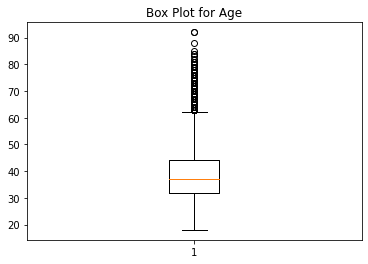

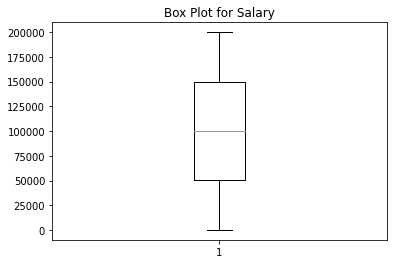

In [57]:
gender = np.asarray([df["gender"] == "Male"], dtype=np.float64)

country_dict = {}
id = 0
for c in df["country"]:
    if not c in country_dict.keys():
        id += 1
        country_dict[c] = id
countries = np.asarray([country_dict[c] for c in df["country"]], dtype=np.float64)

print("age mean: {}, std: {}".format(np.mean(df["age"]), np.std(df["age"])))
print("credit_score mean: {}, std: {}".format(np.mean(df["credit_score"]), np.std(df["credit_score"])))
print("salary mean: {}, std: {}".format(np.mean(df["estimated_salary"]), np.std(df["estimated_salary"])))
print("percent male: {}".format(np.mean(gender)))
print("countries: {}".format(len(country_dict)))

plt.figure(1)
plt.title("Box Plot for Age")
plt.boxplot(df["age"])
plt.figure(2)
plt.title("Box Plot for Salary")
plt.boxplot(df["estimated_salary"])
plt.show()

### Task 3

### Task 4